In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df_vertices = pd.read_csv('vertices.csv')
df_vertices.head()

,node_label,actor
0,v1,Ryan Reynolds
1,v2,Josh Brolin
2,v3,Morena Baccarin
3,v4,Zazie Beetz
4,v5,T.J. Miller


In [3]:
df_edges = pd.read_csv('edges.csv')
df_edges.head()

,first_vertice,second_vertice,label
0,v1,v2,title/tt5463162
1,v1,v3,title/tt5463162
2,v1,v4,title/tt5463162
3,v1,v5,title/tt5463162
4,v1,v6,title/tt5463162


In [4]:
len(df_vertices), len(df_edges)

(489, 3033)

In [5]:
nodes = df_vertices['node_label'].values
edges = zip(df_edges['first_vertice'].values, df_edges['second_vertice'].values)

In [6]:
G = nx.Graph()

In [7]:
G.add_nodes_from(nodes)
G.add_edges_from(edges)

D:\1\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


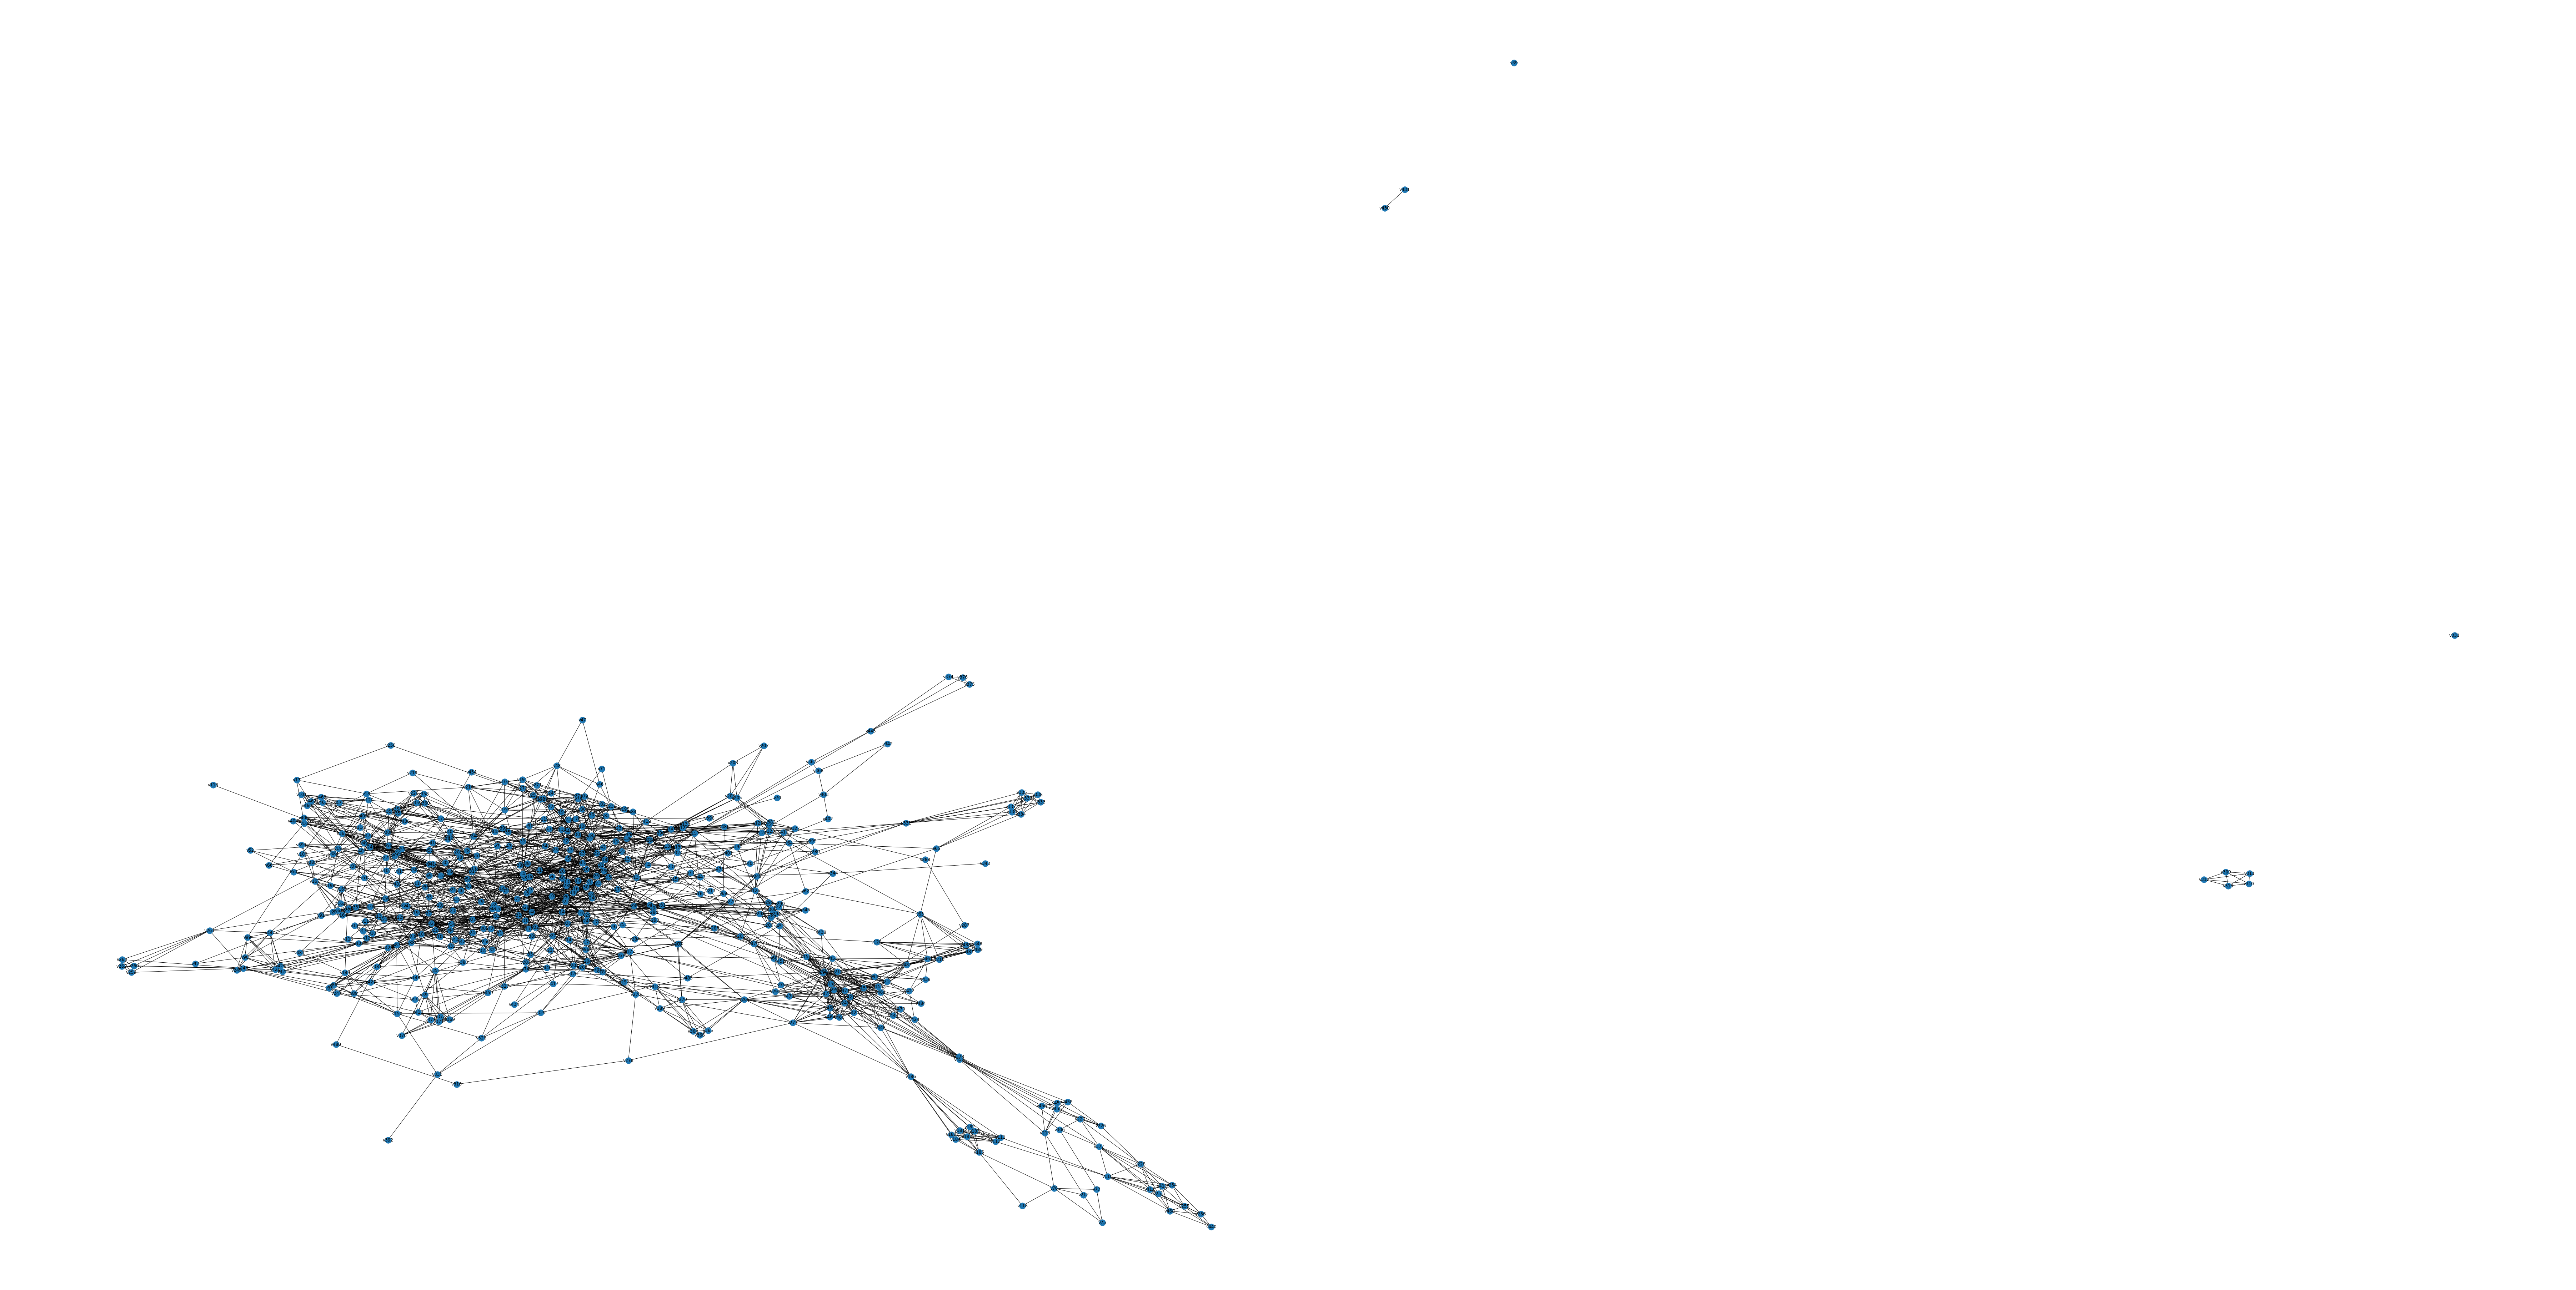

In [8]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (100,50)
pos = nx.spring_layout(G)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos)

plt.savefig('graph.pdf', format='pdf')

plt.show()

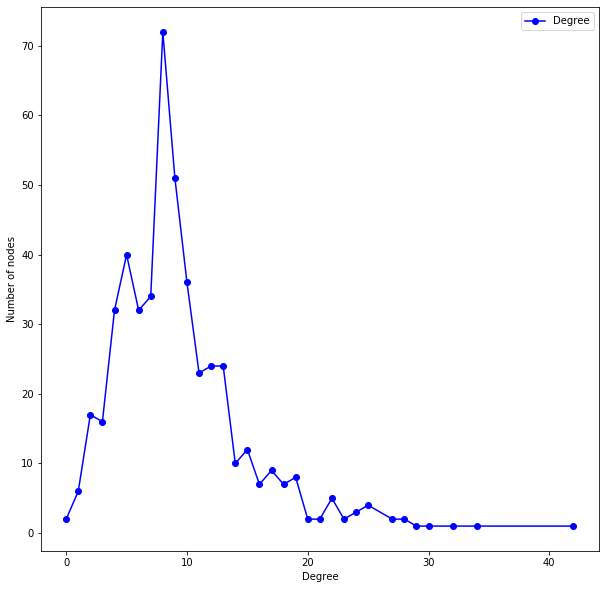

In [11]:
degree = dict(G.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 10))
plt.plot(degree_values, hist, 'bo-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

In [15]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G_strong = G.subgraph(Gcc[0])

Gcc = sorted(nx.connected_components(G), key=len, reverse=False)
G_weak = G.subgraph(Gcc[0])

print ('Диаметр: ', nx.diameter(G_strong))
print ('Среднее расстояние в компоненте сильной связности: ', nx.average_shortest_path_length(G_strong))
print('Среднее расстояние в компоненте слабой связности: ', nx.average_shortest_path_length(G_weak))

Диаметр:  9
Среднее расстояние в компоненте сильной связности:  3.916579679888657
Среднее расстояние в компоненте слабой связности:  0


In [17]:
print ('Кластеризация: ', nx.transitivity(G_strong))
print('Кластерный коэффициент: ', nx.average_clustering(G_strong))
print ('Количество центральных узлов: ', len(nx.center(G_strong)))
print ('Количество узлов на периферии: ', len(nx.periphery(G_strong)))

Кластеризация:  0.4863651297776804
Кластерный коэффициент:  0.5952948997142384
Количество центральных узлов:  3
Количество узлов на периферии:  28
